# The data - Hospitalization

### Information related to patients of COVID-19 and hospitals.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Making dictionary of datasets

In [21]:
data_files = [
    "demographics.csv",
    "epidemiology.csv",
    "hospitalizations.csv",
    "mobility.csv",
    "vaccinations.csv"
]

data = {}

for file in data_files:
    d = pd.read_csv("{0}".format(file))
    key = file.replace(".csv", "")
    data[key] = d

In [22]:
data_files_json = [
    "health.json",
    "economy.json"
]

data_j = {}

for file in data_files_json:
    d = pd.read_csv("{0}".format(file))
    key = file.replace(".json", "")
    data_j[key] = d

## Reading the data

In [21]:

hospitalizations = pd.read_csv("hospitalizations.csv")
hospitalizations.head()

,date,location_key,new_hospitalized_patients,cumulative_hospitalized_patients,current_hospitalized_patients,new_intensive_care_patients,cumulative_intensive_care_patients,current_intensive_care_patients,new_ventilator_patients,cumulative_ventilator_patients,current_ventilator_patients
0,0022-01-10,AR,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,0022-01-20,AR,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,0202-03-30,AR,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,0221-07-06,AR,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1202-01-07,AR,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [22]:
print("The number of rows and columns are:" , hospitalizations.shape)
print()
print("Variables of interest in the data set are:", hospitalizations.columns)

The number of rows and columns are: (1768485, 11)

Variables of interest in the data set are: Index(['date', 'location_key', 'new_hospitalized_patients',
       'cumulative_hospitalized_patients', 'current_hospitalized_patients',
       'new_intensive_care_patients', 'cumulative_intensive_care_patients',
       'current_intensive_care_patients', 'new_ventilator_patients',
       'cumulative_ventilator_patients', 'current_ventilator_patients'],
      dtype='object')


In [23]:
unique_location_keys = hospitalizations["location_key"].unique()
#print("Options in location_key:")
#for location_key in unique_location_keys:
#    print(location_key)

### Only the data per country are necessary, therefore remove all rows for subregions, which are denoted by the locations with "_" under the location_key column and we also drop the rows that th location_key is empty.

## Dropping the location_key that contains _ and are empty

In [24]:
hospitalizations = hospitalizations[hospitalizations['location_key'].str.contains('_') == False]
hospitalizations.dropna(subset=['location_key'], inplace=True)
hospitalizations

,date,location_key,new_hospitalized_patients,cumulative_hospitalized_patients,current_hospitalized_patients,new_intensive_care_patients,cumulative_intensive_care_patients,current_intensive_care_patients,new_ventilator_patients,cumulative_ventilator_patients,current_ventilator_patients
0,0022-01-10,AR,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,0022-01-20,AR,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,0202-03-30,AR,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,0221-07-06,AR,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1202-01-07,AR,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1711316,2022-09-11,US,3881.0,5487343.0,28016.0,NaN,NaN,3505.0,NaN,NaN,NaN
1711317,2022-09-12,US,3904.0,5491247.0,28277.0,NaN,NaN,3578.0,NaN,NaN,NaN
1711318,2022-09-13,US,4376.0,5495623.0,27766.0,NaN,NaN,3486.0,NaN,NaN,NaN
1711319,2022-09-14,US,4594.0,5500217.0,27360.0,NaN,NaN,3449.0,NaN,NaN,NaN


## Checking for missing values

In [25]:
missing_values = hospitalizations.isnull().sum()
missing_values
#[new_hospitalized_patients,new_intensive_care_patients ,new_ventilator_patients]

date                                      0
location_key                              0
new_hospitalized_patients              5386
cumulative_hospitalized_patients       5386
current_hospitalized_patients          9220
new_intensive_care_patients           12232
cumulative_intensive_care_patients    12231
current_intensive_care_patients        9705
new_ventilator_patients               17447
cumulative_ventilator_patients        17446
current_ventilator_patients           13820
dtype: int64

### There are lots of missing data so we drop those columns

In [26]:
columns_to_drop = ['cumulative_hospitalized_patients',
                   'current_hospitalized_patients',
                   'cumulative_intensive_care_patients',
                   'current_intensive_care_patients',
                  'cumulative_ventilator_patients',
                  'current_ventilator_patients']
hospitalizations = hospitalizations.drop(columns=columns_to_drop)

In [27]:
hospitalizations

,date,location_key,new_hospitalized_patients,new_intensive_care_patients,new_ventilator_patients
0,0022-01-10,AR,0.0,0.0,NaN
1,0022-01-20,AR,0.0,0.0,NaN
2,0202-03-30,AR,0.0,0.0,NaN
3,0221-07-06,AR,0.0,0.0,NaN
4,1202-01-07,AR,0.0,0.0,NaN
...,...,...,...,...,...
1711316,2022-09-11,US,3881.0,NaN,NaN
1711317,2022-09-12,US,3904.0,NaN,NaN
1711318,2022-09-13,US,4376.0,NaN,NaN
1711319,2022-09-14,US,4594.0,NaN,NaN


## Handling missing data
### imputed the missing values with 0

In [28]:
columns_to_fill = ['new_hospitalized_patients',
                   'new_intensive_care_patients',
                   'new_ventilator_patients'

]

hospitalizations[columns_to_fill] = hospitalizations[columns_to_fill].fillna(0)
hospitalizations

,date,location_key,new_hospitalized_patients,new_intensive_care_patients,new_ventilator_patients
0,0022-01-10,AR,0.0,0.0,0.0
1,0022-01-20,AR,0.0,0.0,0.0
2,0202-03-30,AR,0.0,0.0,0.0
3,0221-07-06,AR,0.0,0.0,0.0
4,1202-01-07,AR,0.0,0.0,0.0
...,...,...,...,...,...
1711316,2022-09-11,US,3881.0,0.0,0.0
1711317,2022-09-12,US,3904.0,0.0,0.0
1711318,2022-09-13,US,4376.0,0.0,0.0
1711319,2022-09-14,US,4594.0,0.0,0.0


### Variables that we decided to move on with:
#### date:	date (YYYY-MM-DD) of the datapoint	2021-02-07
#### location_key:	Unique string identifying the region ID
#### new_hospitalized_patients: Count of new cases hospitalized after positive test on this date
#### new_intensive_care_patients: Count of new cases admitted into ICU after a positive COVID-19 test on this date
#### new_ventilator_patients


## Creating new column by Date (year)

### We realize that some data in column Date have typo so we drop them first and we also want to know about years after Covid and vaccination so we need years 2021 and 2022

In [29]:
hospitalizations['date'].unique

<bound method Series.unique of 0          0022-01-10
1          0022-01-20
2          0202-03-30
3          0221-07-06
4          1202-01-07
              ...    
1711316    2022-09-11
1711317    2022-09-12
1711318    2022-09-13
1711319    2022-09-14
1711320    2022-09-15
Name: date, Length: 17866, dtype: object>

In [30]:
hospitalizations['date'] = pd.to_datetime(hospitalizations['date'], format='%Y-%m-%d', errors='coerce')
hospitalizations = hospitalizations[hospitalizations['date'].dt.year >= 2020]

In [31]:
hospitalizations['year'] = hospitalizations['date'].dt.year
hospitalizations['month'] = hospitalizations['date'].dt.month
hospitalizations_ = hospitalizations.drop(columns = ["date"])
hospitalizations_

<ipython-input-31-326e954fb1f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospitalizations['year'] = hospitalizations['date'].dt.year
<ipython-input-31-326e954fb1f3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospitalizations['month'] = hospitalizations['date'].dt.month


,location_key,new_hospitalized_patients,new_intensive_care_patients,new_ventilator_patients,year,month
70,AR,1.0,0.0,0.0,2020,1
71,AR,0.0,0.0,0.0,2020,1
72,AR,0.0,0.0,0.0,2020,1
73,AR,0.0,0.0,0.0,2020,1
74,AR,1.0,0.0,0.0,2020,1
...,...,...,...,...,...,...
1711316,US,3881.0,0.0,0.0,2022,9
1711317,US,3904.0,0.0,0.0,2022,9
1711318,US,4376.0,0.0,0.0,2022,9
1711319,US,4594.0,0.0,0.0,2022,9


In [36]:
hospitalization_groupby = hospitalizations.groupby(['location_key','year','month'])[['new_hospitalized_patients',
                   'new_intensive_care_patients',
                   'new_ventilator_patients']].agg([sum])
hospitalization_groupby

new_hospitalized_patients new_intensive_care_patients  \
                                              sum                         sum   
location_key year month                                                         
AR           2020 1                          10.0                         0.0   
                  2                          28.0                         3.0   
                  3                        3746.0                       650.0   
                  4                       17878.0                      2483.0   
                  5                       22489.0                      3456.0   
...                                           ...                         ...   
US           2022 5                      103761.0                         0.0   
                  6                      138762.0                         0.0   
                  7                      192033.0                         0.0   
                  8                      177827.0                         0.0   
                  9                       68282.0                         0.0   

                        new_ventilator_patients  
                                            sum  
location_key year month                          
AR           2020 1                         0.0  
                  2                         0.0  
                  3                         0.0  
                  4                         0.0  
                  5                         0.0  
...                                         ...  
US           2022 5                         0.0  
                  6                         0.0  
                  7                         0.0  
                  8                         0.0  
                  9                         0.0  

[630 rows x 3 columns]

In [34]:
hospitalization_groupby_year = hospitalizations.groupby(['year'])[['new_hospitalized_patients',
                   'new_intensive_care_patients',
                   'new_ventilator_patients']].agg([sum])
hospitalization_groupby_year

,new_hospitalized_patients,new_intensive_care_patients,new_ventilator_patients
,sum,sum,sum
year,,,
2020,5689184.0,352615.0,3672.0
2021,21917425.0,548995.0,609.0
2022,174761007.0,49610.0,0.0


## Checking for outliers

In [32]:
hospitalizations_.describe().applymap("{0:.2f}".format)

,new_hospitalized_patients,new_intensive_care_patients,new_ventilator_patients,year,month
count,17795.00,17795.00,17795.00,17795.00,17795.00
mean,11372.16,53.45,0.24,2020.82,6.29
std,105392.46,210.96,2.46,0.75,3.26
min,-2858.00,-29.00,-20.00,2020.00,1.00
25%,0.00,0.00,0.00,2020.00,4.00
50%,58.00,0.00,0.00,2021.00,6.00
75%,759.00,8.00,0.00,2021.00,9.00
max,1993062.00,2905.00,113.00,2022.00,12.00


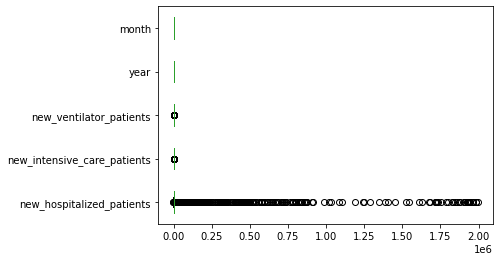

In [37]:
hospitalizations.plot.box(vert=False)
plt.show()